# Tutorial 3

Design spatial omics experiment for consecutive breast cancer section2

Please download according demo data from following link and place it under the demo folder:

google drive: https://drive.google.com/drive/folders/1z1nk0sF_e25LKMyHxJVMtROFjuWet2G_?usp=drive_link

Please also download the checkpoint file for the pathology foundation model and place it under the checkpoints folder

# Step 1: Preprocess the H&E image

Make sure the physical size of each pixel is 0.5 micron

Image loaded from ../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g1/he-raw.jpg
Rescaling image (scale: 0.571)...
282 sec
../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g1/he-scaled.jpg
../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g1/he.jpg
Preprocessed H&E image saved!
Image loaded from ../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g2/he-raw.jpg
Rescaling image (scale: 0.571)...
277 sec
../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g2/he-scaled.jpg
../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g2/he.jpg
Preprocessed H&E image saved!
Image loaded from ../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g3/he-raw.jpg
Rescaling image (scale: 0.571)...
272 sec
../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g3/he-scaled.jpg
../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g3/he.jpg
Preprocessed H&E image saved!


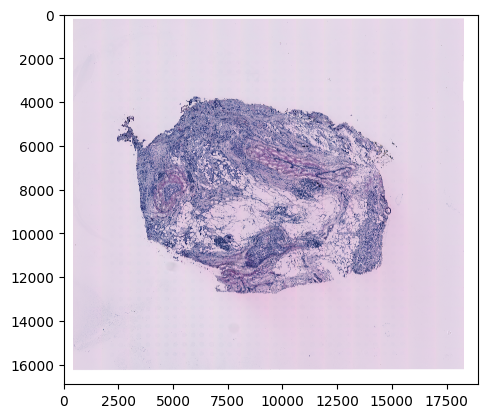

In [1]:
import sys
sys.path.append('..')
from s2omics.p1_histology_preprocess import histology_preprocess

prefix_list = ['../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g1/',
              '../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g2/',
              '../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g3/']
for prefix in prefix_list:
    histology_preprocess(prefix, show_image=True)

# Step 2: Quality control for all superpixels

Superpixels are 8 microns * 8 microns square-shaped pseudo cells

We use our new QC package HistoSweep for this procedure

Image loaded from ../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g1/he.jpg
0 0
../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g1/S2Omics_output/pickle_files/shapes.pickle
[compute_metrics_memory_optimized] Current memory: 0.0452 GB; Peak memory: 1.0486 GB
[compute_low_density_mask] Current memory: 0.0012 GB; Peak memory: 0.0714 GB
Total selected for density filtering:  116905
✅ Entropy map saved as 'glcm_entropy_map_colored.png'
✅ Energy map saved as 'glcm_energy_map_colored.png'
✅ Homogeneity map saved as 'glcm_homogeneity_map_colored.png'

=== GLCM Metric Means ===
   homogeneity    energy   entropy
0     0.811977  0.364315  0.393492
1     0.433210  0.087103  0.793905
2     0.585925  0.166482  0.641603
3     0.325897  0.040935  0.879235

=== Cluster Scores ===
Cluster 0: Score = 0.7828
Cluster 1: Score = -0.2736
Cluster 2: Score = 0.1108
Cluster 3: Score = -0.5124

=== Number of Observations per Cluster ===
Cluster 0: 1073
Cluster 1: 4918
Cluster

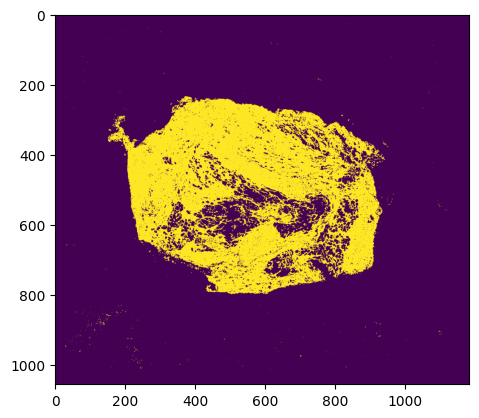

In [2]:
from s2omics.p2_superpixel_quality_control import superpixel_quality_control

save_folder_list = ['../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g1/S2Omics_output',
                    '../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g2/S2Omics_output',
                    '../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g3/S2Omics_output']
for (prefix, save_folder) in zip(prefix_list, save_folder_list):
    superpixel_quality_control(prefix, save_folder, show_image=True)

# Step 3: Histology feature extraction

In [3]:
from s2omics.p3_feature_extraction import histology_feature_extraction

# down_samp_step: the down-sampling step, 
# default = 10 refers to only extract features for superpixels whose row_index and col_index can both be divided by 10 (roughly 1:100 down-sampling rate). 
# down_samp_step = 1 means extract features for every superpixel
for (prefix, save_folder) in zip(prefix_list, save_folder_list):
    histology_feature_extraction(prefix, save_folder,
                                 foundation_model='uni',
                                 ckpt_path='../checkpoints/uni/',
                                 device='cuda:0',
                                 batch_size=32,
                                 down_samp_step=10,
                                 num_workers=4)

/data1/msyuan/anaconda3/envs/S2Omics/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Histology foundation model loaded! 
    Foundation model name: uni
    Start extracting histology feature embeddings...
Image loaded from ../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g1/he.jpg
../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g1/S2Omics_output/pickle_files/num_patches.pickle


  0%|          | 0/384 [00:00<?, ?it/s]

Batch 0:
Shape of patches: torch.Size([32, 3, 224, 224])
Shape of positions[0]: torch.Size([32])
Content of positions[0][:10]: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Content of positions[1][:10]: tensor([   0,  160,  320,  480,  640,  800,  960, 1120, 1280, 1440])
Shape of feature_emb: torch.Size([32, 197, 1024])
Shape of patch_emb: torch.Size([32, 1024, 14, 14])


100%|█████████▉| 383/384 [04:45<00:00,  1.27it/s]

Part 0 patch number: 12257


100%|██████████| 384/384 [04:46<00:00,  1.34it/s]

../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g1/S2Omics_output/pickle_files/uni_embeddings_downsamp_10_part_0.pickle


Histology foundation model loaded! 
    Foundation model name: uni
    Start extracting histology feature embeddings...
Image loaded from ../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g2/he.jpg
../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g2/S2Omics_output/pickle_files/num_patches.pickle


  0%|          | 0/395 [00:00<?, ?it/s]

Batch 0:
Shape of patches: torch.Size([32, 3, 224, 224])
Shape of positions[0]: torch.Size([32])
Content of positions[0][:10]: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Content of positions[1][:10]: tensor([   0,  160,  320,  480,  640,  800,  960, 1120, 1280, 1440])
Shape of feature_emb: torch.Size([32, 197, 1024])
Shape of patch_emb: torch.Size([32, 1024, 14, 14])


100%|█████████▉| 394/395 [05:10<00:00,  1.27it/s]

Part 0 patch number: 12614


100%|██████████| 395/395 [05:11<00:00,  1.27it/s]

../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g2/S2Omics_output/pickle_files/uni_embeddings_downsamp_10_part_0.pickle


Histology foundation model loaded! 
    Foundation model name: uni
    Start extracting histology feature embeddings...
Image loaded from ../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g3/he.jpg
../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g3/S2Omics_output/pickle_files/num_patches.pickle


  0%|          | 0/395 [00:00<?, ?it/s]

Batch 0:
Shape of patches: torch.Size([32, 3, 224, 224])
Shape of positions[0]: torch.Size([32])
Content of positions[0][:10]: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Content of positions[1][:10]: tensor([   0,  160,  320,  480,  640,  800,  960, 1120, 1280, 1440])
Shape of feature_emb: torch.Size([32, 197, 1024])
Shape of patch_emb: torch.Size([32, 1024, 14, 14])


100%|█████████▉| 394/395 [05:08<00:00,  1.28it/s]

Part 0 patch number: 12614


100%|██████████| 395/395 [05:09<00:00,  1.28it/s]

../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g3/S2Omics_output/pickle_files/uni_embeddings_downsamp_10_part_0.pickle


# Step 4: Joint histology segmentation

Pickle loaded from ../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g1/S2Omics_output/pickle_files/shapes.pickle
Pickle loaded from ../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g1/S2Omics_output/pickle_files/qc_preserve_indicator.pickle
Loading histology feature embeddings for image 0...
Pickle loaded from ../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g1/S2Omics_output/pickle_files/uni_embeddings_downsamp_10_part_0.pickle
Sucessfully loaded and normalized all histology feature embeddings!
Pickle loaded from ../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g2/S2Omics_output/pickle_files/shapes.pickle
Pickle loaded from ../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g2/S2Omics_output/pickle_files/qc_preserve_indicator.pickle
Loading histology feature embeddings for image 1...
Pickle loaded from ../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g2/S2Omics_output/pickle_files/uni_e

2025-10-14 17:27:06,237 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-10-14 17:27:14,618 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-10-14 17:27:14,707 - harmonypy - INFO - Iteration 1 of 10
2025-10-14 17:27:18,155 - harmonypy - INFO - Iteration 2 of 10
2025-10-14 17:27:21,606 - harmonypy - INFO - Iteration 3 of 10
2025-10-14 17:27:24,677 - harmonypy - INFO - Iteration 4 of 10
2025-10-14 17:27:25,999 - harmonypy - INFO - Iteration 5 of 10
2025-10-14 17:27:27,322 - harmonypy - INFO - Iteration 6 of 10
2025-10-14 17:27:28,687 - harmonypy - INFO - Converged after 6 iterations


Start segmenting the histology image, clustering method: kmeans
../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g1/S2Omics_output/pickle_files/cluster_image.pickle
Segmentation image is stored at: ../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g1/S2Omics_output/image_files/cluster_image_num_clusters_20.jpg
../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g2/S2Omics_output/pickle_files/cluster_image.pickle
Segmentation image is stored at: ../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g2/S2Omics_output/image_files/cluster_image_num_clusters_20.jpg
../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g3/S2Omics_output/pickle_files/cluster_image.pickle
Segmentation image is stored at: ../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g3/S2Omics_output/image_files/cluster_image_num_clusters_20.jpg


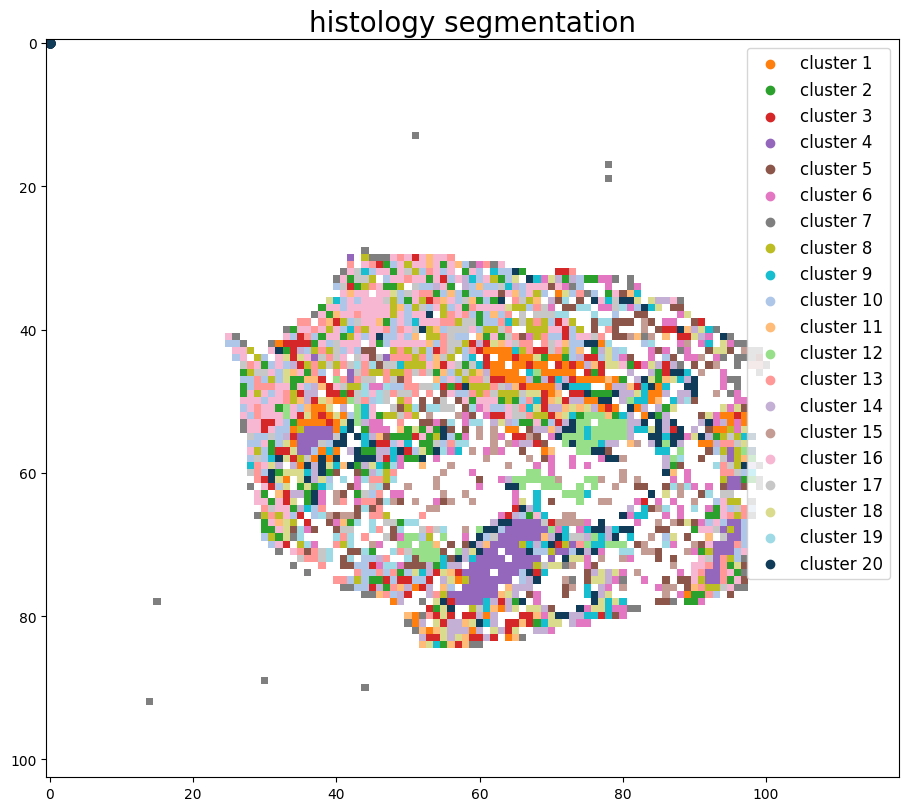

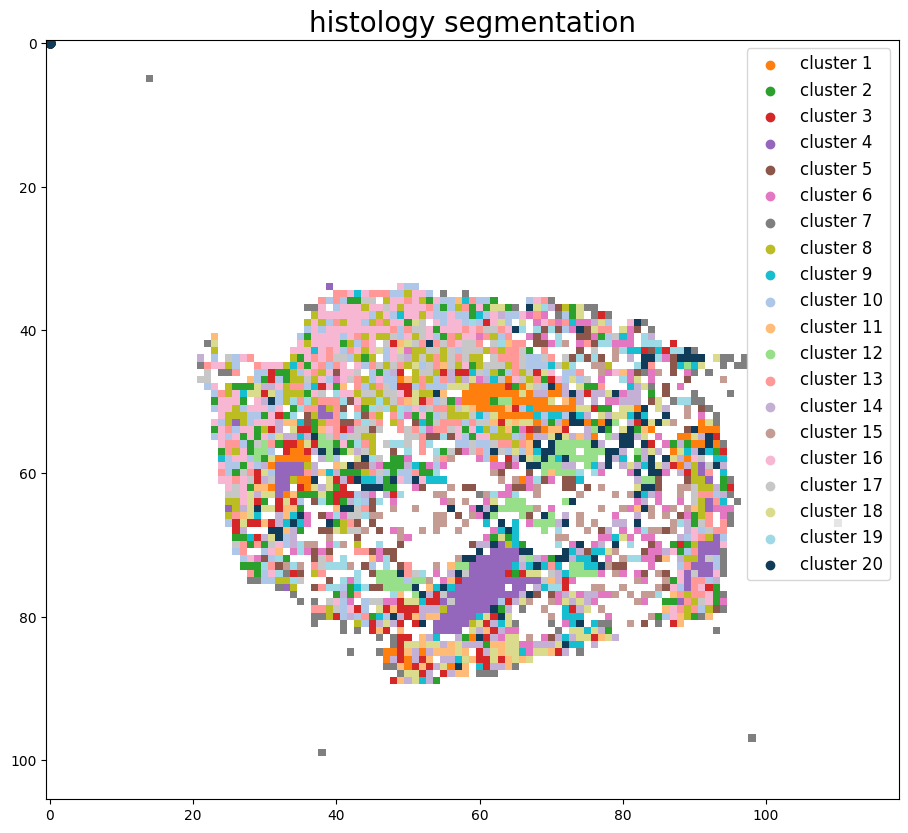

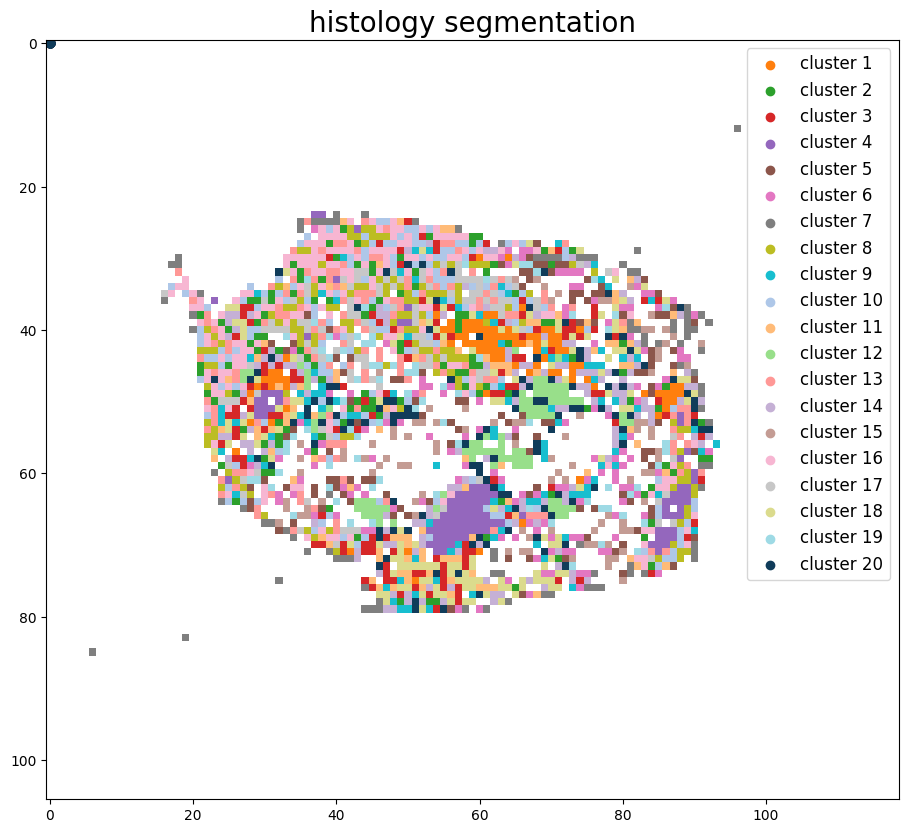

In [2]:
from s2omics.multiple_sections.p4_get_histology_segmentation import get_joint_histology_segmentation

get_joint_histology_segmentation(prefix_list, save_folder_list,
                                 foundation_model='uni',
                                 down_samp_step=10,
                                 clustering_method='kmeans',
                                 n_clusters=20)

# Step 5: Select best ROI for spatial omics experiment

Pickle loaded from ../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g1/S2Omics_output/pickle_files/shapes.pickle
Pickle loaded from ../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g1/S2Omics_output/pickle_files/cluster_image.pickle
Pickle loaded from ../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g2/S2Omics_output/pickle_files/shapes.pickle
Pickle loaded from ../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g2/S2Omics_output/pickle_files/cluster_image.pickle
Pickle loaded from ../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g3/S2Omics_output/pickle_files/shapes.pickle
Pickle loaded from ../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g3/S2Omics_output/pickle_files/cluster_image.pickle
[(103, 119), (106, 119), (106, 119)]
Sampling ROI candidates...


100%|██████████| 3600/3600 [00:00<00:00, 3866.99it/s]


Current best ROI: [[[45, 31], [63, 31], [63, 49], [45, 49]]]
    roi score: 0.7813556906243225
    scale score: 0.5218310997663257
    valid score: 0.9984555975339682
    balance score: 0.915561715045757
Current number of ROIs is 1.
Find the best 1 ROI(s) with: 
    ROI score: 0.7813556906243225
    Scale score: 0.5218310997663257
    Coverage score: 0.9984555975339682
    Balance score: 0.915561715045757
    
../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g1/S2Omics_output/roi_selection_detailed_output/circle_roi_size_1.5_1.5/prior_preference_1/best_roi.pickle
Best ROI on histology segmentation image is stored at ../demo/Tutorial_3_Consecutive_ROI_selection_breast/breast_cancer_g1/S2Omics_output/main_output/best_roi_on_histology_segmentations.jpg


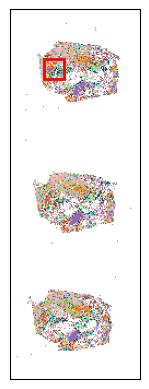

In [2]:
from s2omics.multiple_sections.p5_roi_selection_rectangle import roi_selection_for_multiple_sections

# fusion_weights: the weight of three scores, default=[0.33,0.33,0.33], the sum of three weights should be equal to 1 (if not they will be normalized)
# positive_prior, negative_prior: prior information about interested and not-interested histology clusters, default = [],[]
# prior_preference: the larger this parameter is, S2Omics will focus more on those interested histology clusters, default=  1
roi_selection_for_multiple_sections(prefix_list, save_folder_list,
                                    down_samp_step=10,
                                    roi_size=[1.5,1.5],
                                    rotation_seg=6,
                                    num_roi=1, #0 refers to automatiacally determine the number of ROI
                                    fusion_weights=[0.33,0.33,0.33],
                                    emphasize_clusters=[], discard_clusters=[],
                                    prior_preference=1)